 # ASSIGNMENT
 
 ***CDF, PDF, PMF***

CDF gives the area under PDF upto X values we specify.

In mathematical form,

Definition. The cumulative distribution function ("c.d.f.") of a continuous random variable X is defined as:

$$F(x)=∫_x−∞f(t)dt𝐹(𝑥)=∫−∞𝑥𝑓(𝑡)𝑑𝑡$$

$$for −∞ < x < ∞$$

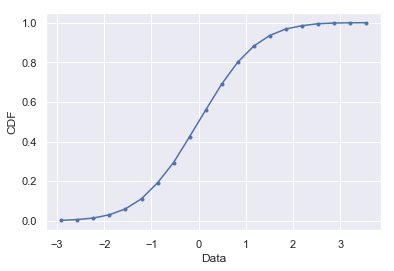

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

num_bins = 20

data = np.random.randn(10000)

counts, bin_edges = np.histogram (data, bins=num_bins, density=True)

cdf = np.cumsum (counts)

plt.plot (bin_edges[1:], cdf/cdf[-1], marker='.')

plt.xlabel('Data')
plt.ylabel('CDF')

plt.show()

### np.interp()

One-dimensional linear interpolation.

Returns the one-dimensional piecewise linear interpolant to a function with given values at discrete data-points.

linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points.

One dimensional interpolation involves considering consecutive points along the X-axis with known Y co-ordinates and predicting the Y co-ordinate for a given X co-ordinate.

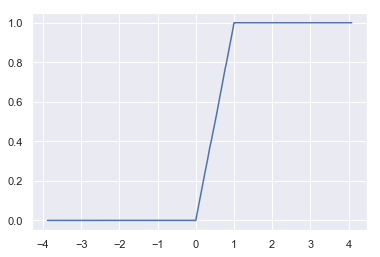

In [27]:

data = np.random.randn(10000)
  # sort the data:
data_sorted = np.sort(data)
 

p= np.linspace(0, 1, len(data), endpoint=False)

f = lambda x: np.interp(x, p, data_sorted)
cdf = scipy.stats.norm.cdf(f(data_sorted)) 
sns.lineplot(x=data_sorted, y=cdf) 

## CDF using scipy

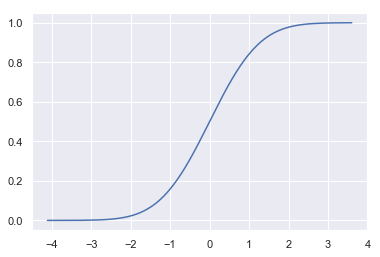

In [15]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns


x = np.random.randn(10000) # generate samples from normal distribution (discrete data)


norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete
   
# plot the cdf
sns.lineplot(x=x, y=norm_cdf) 
plt.show()

# Comparing percentiles to CDF

To see how the percentiles relate to the CDF,  let's plot the data we calculated in the last exercise on the CDF.


The percentile variables from the previous exercise are available in the workspace as data_perc and percentiles.


To ensure the Y-axis of the CDF plot remains between 0 and 1, we need to rescale the percentiles array accordingly - in this case, dividing it by 100.

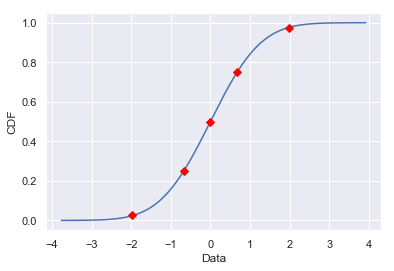

In [3]:
# Plot the CDF
sns.lineplot(x=x, y=norm_cdf)
# plt.plot(counts, bin_edges, '.')
plt.xlabel('Data')
plt.ylabel('CDF')

# Overlay percentiles as red diamonds.

percentiles = np.array([2.5, 25, 50, 75, 97.5])
data_perc = np.percentile(data, percentiles)


plt.plot(data_perc, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

## PDF

How to Create a Probability Density Function Plot in Python with the Numpy, Scipy, and Matplotlib Modules


A probability density function (pdf) is a function that can predict or show the mathematical probability of a value occurring between a certain interval in the function.

PDF is used to assign the probability of a random variable,falling within a range of values .Its used for a continuous random variables.Its probability is given by taking integral of the variable’s PDF over that range.

In mathematical term,

The probability density function of a continuous random variable X with support S is an integrable function f(x) satisfying the following:

(1) f(x) is positive everywhere in the support S, that is, f(x) > 0, for all x in S

(2) The area under the curve f(x) in the support S is 1, that is:

$$∫Sf(x)dx=1∫𝑆𝑓(𝑥)𝑑𝑥=1$$

(3) If f(x) is the p.d.f. of x, then the probability that x belongs to A, where A is some interval, is given by the integral of f(x) over that interval, that is:

$$P(X∈A)=∫Af(x)dx$$


So let's break down this code.

* We first import norm from scipy.stats. This allows us to create a normalized probability density function.

* We then import the numpy module as np. This means that we reference the numpy module with the keyword, np.

* We then import the matplotlib module plotting function because we are going to plot the data.

* So we use the numpy module to create the x-axis, we use sicpy to create a normalied probability density function, and then we use the matplotlib module to plot the data.

* We create a variable, x, and assign it to, np.arange(-4,4,0.001)

* What this line does is it creates an x-axis of values that range from -4 to 4 with an incremenet of 0.001.

* We then plot a normalized probability density function with the line, plt.plot(x, norm.pdf(x))

* We then show this graph plot with the line, plt.show()

After running this code, we get the following output shown below. 

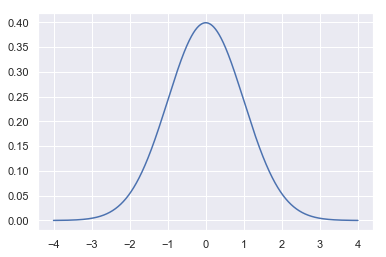

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))

plt.show()

# PMF

PMF is used to assign the probability of a discrete random variable,which is exactly equal to a number like 1,2,3…

In mathematical form,

The probability mass function, $f(x) = P(X = x)$, of a discrete random variable X has the following properties:

All probabilities are positive:$ fx(x) ≥ 0 $ 

Any event in the distribution (e.g. “scoring between 20 and 30”) has a probability of happening of between 0 and 1 (e.g. 0% and 100%).

The sum of all probabilities is 100% (i.e. 1 as a decimal): 

$$ Σfx(x) = 1 $$  

An individual probability is found by adding up the x-values in event A. 

$$P(X Ε A) = summation f(x)(xEA)$$

##  A function that converts any list into a PMF


Plot the resulting PMF using Pandas inbuilt plot command with 'bar' parameter. Make sure that the Series passed is sorted by the index. Use a decorator

In [5]:
from collections import Counter
def sort(fn):
    def wrapper(*args,**kwargs):
        print("hello")
        return fn(sorted(*args),**kwargs)
    return wrapper
@sort
def pmf(series):
    n = len(series)
    d = {}
    counts = Counter(series)
    for _, key in enumerate(counts):
        d[key] = counts[key]/n
    return d

In [50]:
arr=[1,2,3,10,9,8,100,1000,3,3,2]

In [51]:
d=pmf(arr)
print(d)

hello
{1: 0.09090909090909091, 2: 0.18181818181818182, 3: 0.2727272727272727, 8: 0.09090909090909091, 9: 0.09090909090909091, 10: 0.09090909090909091, 100: 0.09090909090909091, 1000: 0.09090909090909091}


In [52]:
import pandas as pd

In [53]:
df=pd.DataFrame.from_dict(d,orient="index")

In [54]:
df.head()


,0
1,0.090909
2,0.181818
3,0.272727
8,0.090909
9,0.090909


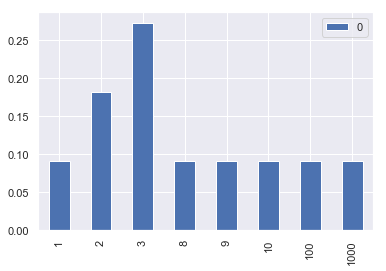

In [55]:

df.plot(kind="bar")



### [Functional Programming] 

CDF Using the lambda expression.

[0.70858265 0.62358335 0.74238175 ... 0.19104407 0.78142689 0.17457891]


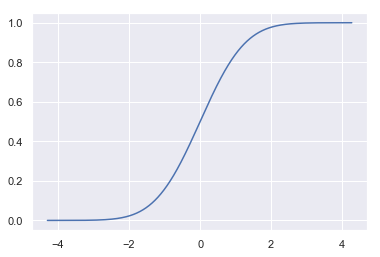

In [17]:
import matplotlib.pyplot as plt
import numpy as np # create some randomly ddistributed data:

x_1 = np.random.randn(10000) # generate samples from normal distribution (discrete data)
f = lambda x: scipy.stats.norm.cdf(x)
print(f(x_1))
sns.lineplot(x=x_1,y=f(x_1))

In [18]:
percentile(N,0.25,key=scipy.stats.norm.cdf)

NameError: name 'percentile' is not defined

## A partial function that always find the 25% of a given array.

In [19]:
import math
import functools

def percentile(N, percent, key=lambda x:x):
    if N is None:
        return None
    k = (len(N)-1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return key(N[int(k)])
    d0 = key(N[int(f)]) * (c-k)
    d1 = key(N[int(c)]) * (k-f)
    return d0+d1
   
percentile1 = functools.partial(percentile, percent=0.25)


In [20]:
N=[1,2,3,4,5,6,7,8,9]
print(N)
print(percentile1(N))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
3


### Pip fitter

fitter package provides a simple class to figure out from whih distribution your data comes from. It uses scipy package to try 80 distributions and allows you to plot the results to check what is the most probable distribution.There are about 80 distributions in scipy so each one of them runs through to find the best fit for the data by using the 'fitter'

Fitted gamma distribution with error=0.0001066594740906448)
Fitted rayleigh distribution with error=0.024438848239043312)
Fitted uniform distribution with error=0.31798308360064637)


C:\Users\sanis\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


,sumsquare_error
gamma,0.000107
rayleigh,0.024439
uniform,0.317983


C:\Users\sanis\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


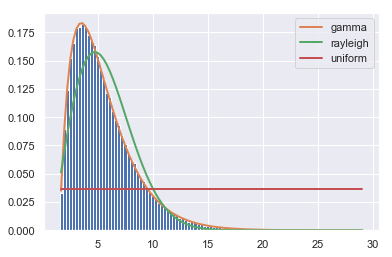

In [49]:
import fitter
from scipy import stats
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=100000)

from fitter import Fitter
f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

array([3.50469500e-02, 8.72037291e-02, 1.24640688e-01, 1.50687001e-01,
       1.67798755e-01, 1.77914427e-01, 1.82590292e-01, 1.83082192e-01,
       1.80404025e-01, 1.75372763e-01, 1.68644317e-01, 1.60742627e-01,
       1.52083495e-01, 1.42994200e-01, 1.33729704e-01, 1.24486050e-01,
       1.15411442e-01, 1.06615411e-01, 9.81763775e-02, 9.01478910e-02,
       8.25637661e-02, 7.54422961e-02, 6.87897024e-02, 6.26029494e-02,
       5.68720297e-02, 5.15818131e-02, 4.67135328e-02, 4.22459732e-02,
       3.81564105e-02, 3.44213524e-02, 3.10171108e-02, 2.79202406e-02,
       2.51078682e-02, 2.25579313e-02, 2.02493479e-02, 1.81621278e-02,
       1.62774400e-02, 1.45776440e-02, 1.30462945e-02, 1.16681249e-02,
       1.04290154e-02, 9.31594973e-03, 8.31696472e-03, 7.42109376e-03,
       6.61830806e-03, 5.89945632e-03, 5.25620455e-03, 4.68097684e-03,
       4.16689789e-03, 3.70773786e-03, 3.29785980e-03, 2.93216997e-03,
       2.60607116e-03, 2.31541908e-03, 2.05648167e-03, 1.82590159e-03,
      

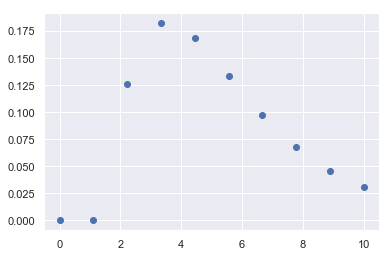

In [56]:
from pylab import linspace, plot
import scipy.stats
dist = scipy.stats.gamma
param = (1.9870, 1.5026, 2.0174)
X = linspace(0,10, 10)
pdf_fitted = dist.pdf(X, *param)
plot(X, pdf_fitted, 'o')
f.fitted_pdf['gamma']